In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
#print(check_output)

In [3]:
# Load data
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')

(-0.5, 63.5, 63.5, -0.5)

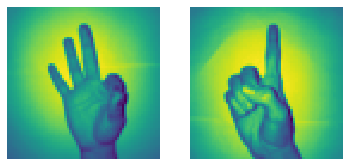

In [4]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[26].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [5]:
# Lets just select number signs of zero and one.
X = np.concatenate((x_l[204: 409], x_l[822:1027]), axis = 0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0], 1)
print(X.shape)
print(Y.shape)

(410, 64, 64)
(410, 1)


In [6]:
# Split data into training and test data sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)
print(X_train.shape[0])
print(X_test.shape[0])

348
62


In [7]:
# Flattening
X_train_flatten = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(348, 4096)
(62, 4096)


In [8]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_test = Y_test.T
y_train = Y_train.T
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 348)
(4096, 62)
(1, 348)
(1, 62)


In [9]:
# Initiate the weight and bias
def initiate_weight_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0
    return w, b

In [10]:
w, b = initiate_weight_and_bias(4096)
w.shape

(4096, 1)

In [11]:
# Define Zigmoid function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [12]:
y_head= sigmoid(0)
y_head

0.5

In [13]:
# forward and backward propagation
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    derivative_weight = np.dot(x_train, (y_head - y_train).T)/x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train)/x_train.shape[1]
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients
    

In [14]:
# Update learning parameters
%matplotlib notebook
def update_learning_parameters(w, b, x_train, y_train, learning_rate, number_of_iteration):
    
    cost_list = []
    cost_list_2 = []
    index = []
    
    
    for i in range(number_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        # update w and b
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        
        if i%10 == 0:
            cost_list_2.append(cost)
            index.append(i)
    parameters = {'weight': w, 'bias': b}
    plt.plot(index, cost_list_2)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.show()
    
    
    return parameters, gradients, cost_list
        
        

In [15]:
# Prediction
def predict(w, b, x_test):
    
    z = np.dot(w.T, x_test) + b
    y = sigmoid(z)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(y.shape[1]):
        if y[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    return Y_prediction

In [16]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_of_iteration):
    dimension = x_train.shape[0]
    w, b = initiate_weight_and_bias(dimension)
    
    parameter, gradients, cost_list = update_learning_parameters(w, b, x_train, y_train, learning_rate, num_of_iteration)
    
    y_prediction_train = predict(parameter['weight'], parameter['bias'], x_train)
    y_prediction_test = predict(parameter['weight'], parameter['bias'], x_test)
    
    print("train accuracy: {} %".format(100 - 100 * np.mean(np.abs(y_prediction_train - y_train))))
    print("test accuracy: {} %".format(100 - 100 * np.mean(np.abs(y_prediction_test - y_test))))

<IPython.core.display.Javascript object>


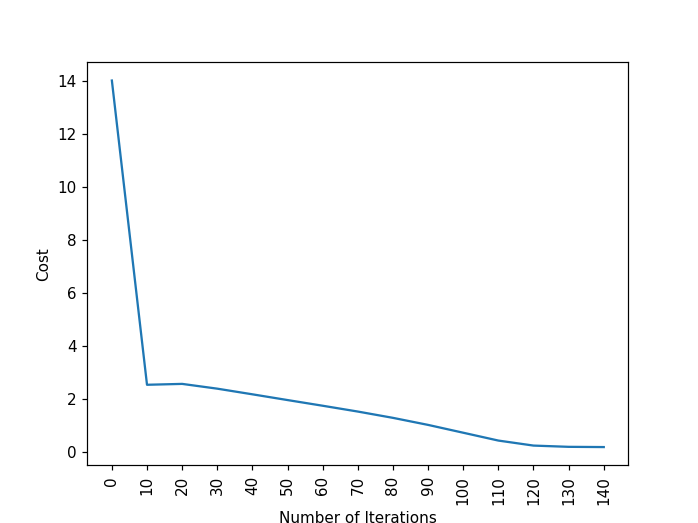

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [17]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_of_iteration=150)

# Logistic Regression From Sklearn

In [18]:
from sklearn import linear_model
Logreg = linear_model.LogisticRegression(random_state = 42, max_iter=150)

In [19]:
x_train.T.shape

(348, 4096)

In [20]:
print('test accuracy: {}'.format(Logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))

test accuracy: 0.967741935483871


<IPython.core.display.Javascript object>


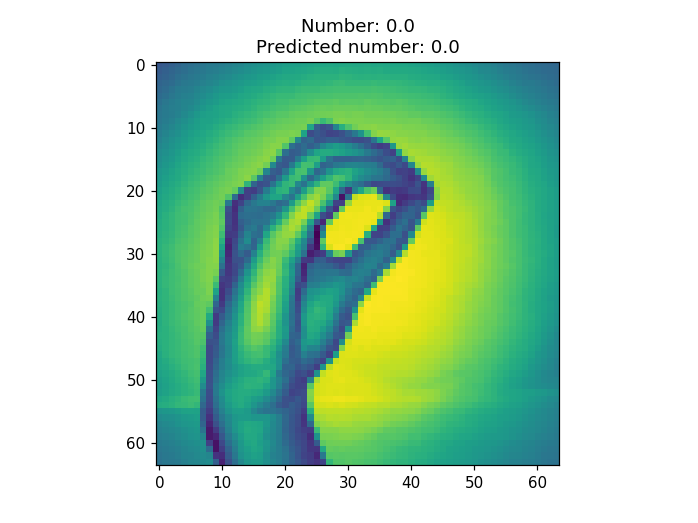

Text(0.5, 1.0, 'Number: 0.0\nPredicted number: 0.0')

In [21]:
%matplotlib notebook
n = 60 # nth sign
plt.imshow(X_test[n].reshape(img_size, img_size))
plt.title('Number: {}'.format(Y_test[n][0]) + '\n' + 'Predicted number: {}'.format(Logreg.predict(x_test.T)[n]))

<IPython.core.display.Javascript object>


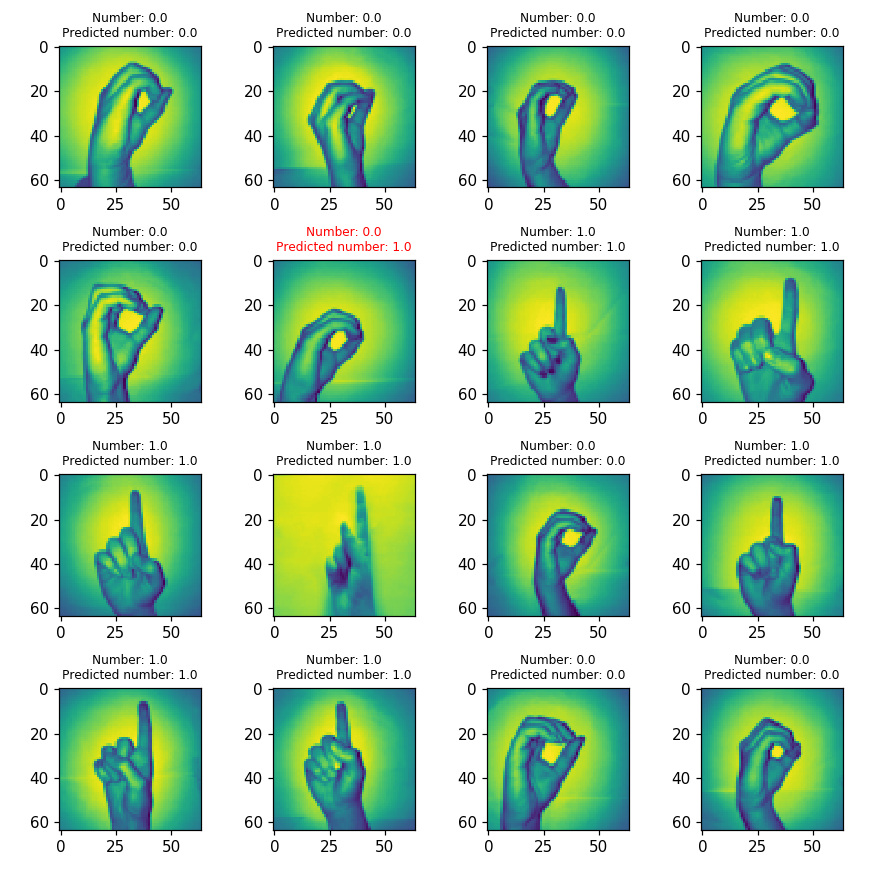

In [22]:
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i +1)
    plt.imshow(X_test[i].reshape(img_size, img_size))
    #plt.title('Number: {}'.format(Y_test[i][0]) + '\n' + 
     #                   'Predicted number: {}'.format(Logreg.predict(x_test.T)[i]), fontsize = 8)
    
    if Y_test[i][0] == Logreg.predict(x_test.T)[i]:
        color = 'k'
    else:
        color = 'r'
    plt.title('Number: {}'.format(Y_test[i][0]) + '\n' + 
              'Predicted number: {}'.format(Logreg.predict(x_test.T)[i]), fontsize = 8, color = color)
        

plt.tight_layout()

# Artificial Neural Network

In [23]:
# Now lets implement a two layer ANN

In [24]:
def initialize_parameters_and_layer_size_NN(x_train, y_train):
    
    parameters = {'weight1': np.random.randn(3, x_train.shape[0]) * 0.1, 
                  'bias1': np.zeros((3,1)), 'weight2': np.random.randn(y_train.shape[0], 3) * 0.1, 
                  'bias2': np.zeros((y_train.shape[0], 1))}
    
    return parameters
    

In [25]:
y_train.shape[0]

1

In [26]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters['weight1'], x_train) + parameters['bias1']
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters['weight2'], A1) + parameters['bias2']
    A2 = sigmoid(Z2)
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    
    return A2, cache
    

In [27]:
# Cost function
def compute_cost_NN(A2, Y):
    log_product = np.multiply(np.log(A2), Y)
    cost = -np.sum(log_product)/Y.shape[1]
    
    return cost

In [28]:
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache['A2'] - Y
    dW2 = np.dot(dZ2, cache['A1'].T)/X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims=True)/X.shape[1]
    
    dZ1 = np.dot(parameters['weight2'].T, dZ2) * (1 - np.power(cache['A1'], 2))
    dW1 = np.dot(dZ1, X.T)/X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims=True)/X.shape[1]
    
    grads = {'dweight1': dW1, 'dbias1': db1, 'dweight2': dW2, 'dbias2': db2}
    
    return grads

In [29]:
def update(parameters, grads, learning_rate = 0.01):
    parameters = {'weight1': parameters['weight1'] - learning_rate * grads['dweight1'],
                 'bias1': parameters['bias1'] - learning_rate * grads['dbias1'],
                 'weight2': parameters['weight2'] - learning_rate * grads['dweight2'],
                 'bias2': parameters['bias2'] - learning_rate * grads['dbias2']}
    
    return parameters

In [30]:
def predict_NN(parameters, x_test):
    
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_predict = np.zeros((1, x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0, i]<= 0.5:
            Y_predict[0, i] = 0
        else:
            Y_predict[0, i] = 1
            
    return Y_predict

In [ ]:
%matplotlib notebook
def two_layer_NN(x_test, y_test, x_train, y_train, num_iteration):
    
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_size_NN(x_train, y_train)
    
    for i in range(0, num_iteration):
        A2, cache = forward_propagation_NN(x_train, parameters)
        cost = compute_cost_NN(A2, y_train)
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        parameters = update(parameters, grads, learning_rate = 0.01)
        
        if i%100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print('Cost after iteration %i: %f'%(i, cost))
    
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = 90)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.show()
    
    y_prediction_train = predict_NN(parameters, x_train)
    y_prediction_test = predict_NN(parameters, x_test)
    
    print('Accuracy for train set: {} %'.format(100 - 
                                                np.sum(np.abs(y_prediction_train - y_train))/x_train.shape[1] * 100))
    
    print('Accuracy for test set: {} %'.format(100 - 
                                                np.sum(np.abs(y_prediction_test - y_test))/x_test.shape[1] * 100))
    
    return parameters
    
        
        
        
parameters = two_layer_NN(x_test, y_test, x_train, y_train, num_iteration = 1500)           

Cost after iteration 0: 0.358207
Cost after iteration 100: 0.341890
Cost after iteration 200: 0.340275
Cost after iteration 300: 0.336789
Cost after iteration 400: 0.326802
Cost after iteration 500: 0.306772
Cost after iteration 600: 0.271902
Cost after iteration 700: 0.229323
Cost after iteration 800: 0.194397
Cost after iteration 900: 0.138263
Cost after iteration 1000: 0.148435
Cost after iteration 1100: 0.132402


# Implementing with Keras Libraries

In [43]:
#reshape our date
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [44]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
#from keras.models import Sequential 
#from keras.layers import Dense, Flatten 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

Using TensorFlow backend.


In [45]:
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [46]:
classifier = KerasClassifier(build_fn=build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
accuracy_mean = accuracies.mean()
accuracy_variance = accuracies.std()
print('Accuracy Mean: {}'.format(accuracy_mean))
print('Accuracy STD: {}'.format(accuracy_variance))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
232/232 [==============================] - 0s 629us/sample - loss: 0.6930 - acc: 0.5431
Epoch 2/100
232/232 [==============================] - 0s 108us/sample - loss: 0.6917 - acc: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 112us/sample - loss: 0.6902 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 86us/sample - loss: 0.6891 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 99us/sample - loss: 0.6869 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 91us/sample - loss: 0.6854 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 99us/sample - loss: 0.6843 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 96us/sample - loss: 0.6825 - acc: 

Epoch 76/100
232/232 [==============================] - 0s 82us/sample - loss: 0.2698 - acc: 0.9483
Epoch 77/100
232/232 [==============================] - 0s 86us/sample - loss: 0.2648 - acc: 0.9612
Epoch 78/100
232/232 [==============================] - 0s 82us/sample - loss: 0.2652 - acc: 0.9655
Epoch 79/100
232/232 [==============================] - 0s 78us/sample - loss: 0.2562 - acc: 0.9698
Epoch 80/100
232/232 [==============================] - 0s 86us/sample - loss: 0.2543 - acc: 0.9655
Epoch 81/100
232/232 [==============================] - 0s 78us/sample - loss: 0.2576 - acc: 0.9612
Epoch 82/100
232/232 [==============================] - 0s 78us/sample - loss: 0.2616 - acc: 0.9741
Epoch 83/100
232/232 [==============================] - 0s 86us/sample - loss: 0.2627 - acc: 0.9483
Epoch 84/100
232/232 [==============================] - 0s 82us/sample - loss: 0.2592 - acc: 0.9741
Epoch 85/100
232/232 [==============================] - 0s 86us/sample - loss: 0.2474 - acc: 0.9655


232/232 [==============================] - 0s 82us/sample - loss: 0.1958 - acc: 0.9784
Epoch 58/100
232/232 [==============================] - 0s 82us/sample - loss: 0.1906 - acc: 0.9871
Epoch 59/100
232/232 [==============================] - 0s 91us/sample - loss: 0.1888 - acc: 0.9828
Epoch 60/100
232/232 [==============================] - 0s 99us/sample - loss: 0.1824 - acc: 0.9828
Epoch 61/100
232/232 [==============================] - 0s 91us/sample - loss: 0.1834 - acc: 0.9655
Epoch 62/100
232/232 [==============================] - 0s 78us/sample - loss: 0.1910 - acc: 0.9741
Epoch 63/100
232/232 [==============================] - 0s 86us/sample - loss: 0.1714 - acc: 0.9741
Epoch 64/100
232/232 [==============================] - 0s 95us/sample - loss: 0.1709 - acc: 0.9784
Epoch 65/100
232/232 [==============================] - 0s 99us/sample - loss: 0.1597 - acc: 0.9871
Epoch 66/100
232/232 [==============================] - 0s 112us/sample - loss: 0.1561 - acc: 0.9871
Epoch 67/100

232/232 [==============================] - 0s 116us/sample - loss: 0.3916 - acc: 0.9267
Epoch 39/100
232/232 [==============================] - 0s 108us/sample - loss: 0.3870 - acc: 0.9353
Epoch 40/100
232/232 [==============================] - 0s 91us/sample - loss: 0.3856 - acc: 0.9267
Epoch 41/100
232/232 [==============================] - 0s 86us/sample - loss: 0.3825 - acc: 0.9138
Epoch 42/100
232/232 [==============================] - 0s 86us/sample - loss: 0.3912 - acc: 0.9569
Epoch 43/100
232/232 [==============================] - 0s 86us/sample - loss: 0.3758 - acc: 0.9095
Epoch 44/100
232/232 [==============================] - 0s 82us/sample - loss: 0.3789 - acc: 0.9397
Epoch 45/100
232/232 [==============================] - 0s 86us/sample - loss: 0.3610 - acc: 0.9397
Epoch 46/100
232/232 [==============================] - 0s 82us/sample - loss: 0.3610 - acc: 0.9569
Epoch 47/100
232/232 [==============================] - 0s 90us/sample - loss: 0.3725 - acc: 0.9483
Epoch 48/10

In [47]:
accuracies

array([0.9741379 , 0.93103451, 0.96551722])

In [48]:
# Now I use these two import commans:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten 
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [49]:
classifier = KerasClassifier(build_fn=build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
accuracy_mean = accuracies.mean()
accuracy_variance = accuracies.std()
print('Accuracy Mean: {}'.format(accuracy_mean))
print('Accuracy STD: {}'.format(accuracy_variance))


Epoch 1/100
232/232 [==============================] - 0s 970us/step - loss: 0.6930 - accuracy: 0.5431
Epoch 2/100
232/232 [==============================] - 0s 108us/step - loss: 0.6923 - accuracy: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 108us/step - loss: 0.6912 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 112us/step - loss: 0.6894 - accuracy: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 99us/step - loss: 0.6887 - accuracy: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 103us/step - loss: 0.6867 - accuracy: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 112us/step - loss: 0.6849 - accuracy: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 99us/step - loss: 0.6832 - accuracy: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 112us/step - loss: 0.6816 - accuracy: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 112us/step - lo

232/232 [==============================] - 0s 95us/step - loss: 0.1931 - accuracy: 0.9698
Epoch 79/100
232/232 [==============================] - 0s 91us/step - loss: 0.1871 - accuracy: 0.9612
Epoch 80/100
232/232 [==============================] - 0s 91us/step - loss: 0.1878 - accuracy: 0.9698
Epoch 81/100
232/232 [==============================] - 0s 82us/step - loss: 0.1950 - accuracy: 0.9569
Epoch 82/100
232/232 [==============================] - 0s 91us/step - loss: 0.1873 - accuracy: 0.9741
Epoch 83/100
232/232 [==============================] - 0s 86us/step - loss: 0.1823 - accuracy: 0.9612
Epoch 84/100
232/232 [==============================] - 0s 91us/step - loss: 0.1800 - accuracy: 0.9784
Epoch 85/100
232/232 [==============================] - 0s 91us/step - loss: 0.1698 - accuracy: 0.9655
Epoch 86/100
232/232 [==============================] - 0s 86us/step - loss: 0.1708 - accuracy: 0.9655
Epoch 87/100
232/232 [==============================] - 0s 91us/step - loss: 0.1628 - 

232/232 [==============================] - 0s 116us/step - loss: 0.0594 - accuracy: 0.9828
Epoch 57/100
232/232 [==============================] - 0s 99us/step - loss: 0.0655 - accuracy: 0.9871
Epoch 58/100
232/232 [==============================] - 0s 110us/step - loss: 0.0835 - accuracy: 0.9741
Epoch 59/100
232/232 [==============================] - 0s 91us/step - loss: 0.0553 - accuracy: 0.9914
Epoch 60/100
232/232 [==============================] - 0s 95us/step - loss: 0.0553 - accuracy: 0.9914
Epoch 61/100
232/232 [==============================] - 0s 91us/step - loss: 0.0654 - accuracy: 0.9741
Epoch 62/100
232/232 [==============================] - 0s 99us/step - loss: 0.0868 - accuracy: 0.9698
Epoch 63/100
232/232 [==============================] - 0s 95us/step - loss: 0.0516 - accuracy: 0.9871
Epoch 64/100
232/232 [==============================] - 0s 103us/step - loss: 0.0493 - accuracy: 0.9828
Epoch 65/100
232/232 [==============================] - 0s 95us/step - loss: 0.0553

232/232 [==============================] - 0s 125us/step - loss: 0.1185 - accuracy: 0.9569
Epoch 35/100
232/232 [==============================] - 0s 129us/step - loss: 0.1104 - accuracy: 0.9612
Epoch 36/100
232/232 [==============================] - 0s 112us/step - loss: 0.1061 - accuracy: 0.9655
Epoch 37/100
232/232 [==============================] - 0s 108us/step - loss: 0.1027 - accuracy: 0.9741
Epoch 38/100
232/232 [==============================] - 0s 99us/step - loss: 0.0990 - accuracy: 0.9612
Epoch 39/100
232/232 [==============================] - 0s 103us/step - loss: 0.0992 - accuracy: 0.9784
Epoch 40/100
232/232 [==============================] - 0s 103us/step - loss: 0.0932 - accuracy: 0.9741
Epoch 41/100
232/232 [==============================] - 0s 103us/step - loss: 0.0986 - accuracy: 0.9569
Epoch 42/100
232/232 [==============================] - 0s 95us/step - loss: 0.0984 - accuracy: 0.9569
Epoch 43/100
232/232 [==============================] - 0s 99us/step - loss: 0.

In [50]:
accuracies

array([0.9741379 , 0.93103451, 0.93965518])

In [48]:
#And you see the accuracies are very good!!

In [51]:
model = Sequential() # initialize neural network
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
348/348 [==============================] - 0s 741us/step - loss: 0.6932 - accuracy: 0.4655
Epoch 2/100
348/348 [==============================] - 0s 95us/step - loss: 0.6929 - accuracy: 0.5086
Epoch 3/100
348/348 [==============================] - 0s 95us/step - loss: 0.6924 - accuracy: 0.5057
Epoch 4/100
348/348 [==============================] - 0s 92us/step - loss: 0.6907 - accuracy: 0.5057
Epoch 5/100
348/348 [==============================] - 0s 92us/step - loss: 0.6881 - accuracy: 0.5402
Epoch 6/100
348/348 [==============================] - 0s 95us/step - loss: 0.6818 - accuracy: 0.7759
Epoch 7/100
348/348 [==============================] - 0s 103us/step - loss: 0.6715 - accuracy: 0.5920
Epoch 8/100
348/348 [==============================] - 0s 106us/step - loss: 0.6565 - accuracy: 0.8276
Epoch 9/100
348/348 [==============================] - 0s 92us/step - loss: 0.6311 - accuracy: 0.8420
Epoch 10/100
348/348 [==============================] - 0s 95us/step - loss: 0.

348/348 [==============================] - 0s 92us/step - loss: 0.0534 - accuracy: 0.9799
Epoch 81/100
348/348 [==============================] - 0s 92us/step - loss: 0.0514 - accuracy: 0.9828
Epoch 82/100
348/348 [==============================] - 0s 86us/step - loss: 0.0548 - accuracy: 0.9799
Epoch 83/100
348/348 [==============================] - 0s 89us/step - loss: 0.0529 - accuracy: 0.9856
Epoch 84/100
348/348 [==============================] - 0s 89us/step - loss: 0.0527 - accuracy: 0.9856
Epoch 85/100
348/348 [==============================] - 0s 89us/step - loss: 0.0510 - accuracy: 0.9770
Epoch 86/100
348/348 [==============================] - 0s 86us/step - loss: 0.0581 - accuracy: 0.9828
Epoch 87/100
348/348 [==============================] - 0s 89us/step - loss: 0.0478 - accuracy: 0.9885
Epoch 88/100
348/348 [==============================] - 0s 89us/step - loss: 0.0499 - accuracy: 0.9799
Epoch 89/100
348/348 [==============================] - 0s 89us/step - loss: 0.0595 - 

In [56]:
y_prediction = np.zeros((x_test.shape[0], 1)) # or np.zeros(y_test.shape)
prediction = model.predict(x_test)
for i in range(model.predict(x_test).shape[0]):
    if prediction[i, 0] <= 0.5:
        prediction[i, 0] = 0
    if prediction[i, 0] > 0.5:
        prediction[i, 0] = 1 
        

In [57]:
print('Accuracy on test data')
print(model.evaluate(x_test, y_test)[1])

Accuracy on test data
62/62 [==============================] - 0s 81us/step
0.9516128897666931


In [58]:
(100 - 100 * np.mean(np.abs(y_test - prediction))) 

95.16129032258064

<IPython.core.display.Javascript object>


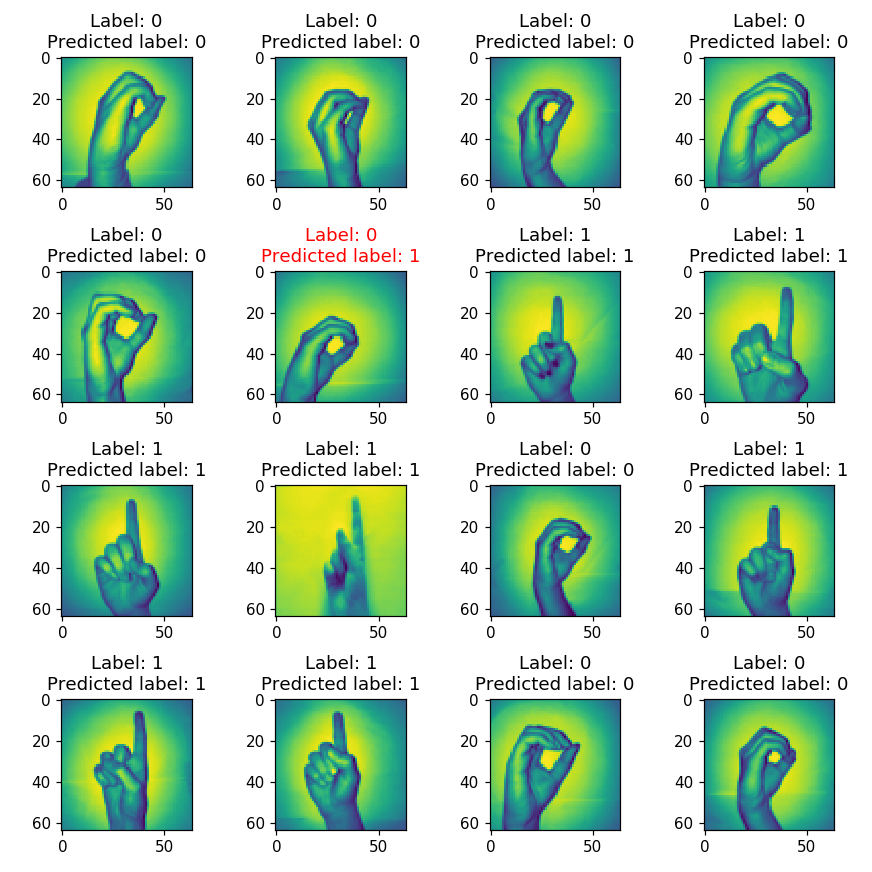

In [60]:
%matplotlib notebook
plt.figure(figsize = (8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i].reshape(img_size, img_size))
    if int(y_test[i][0]) == int(prediction[i][0]):
        color = 'k'
    else: 
        color = 'r'
    plt.title("Label: {}".format(int(y_test[i][0])) + '\n' + 'Predicted label: {}'.format(int(prediction[i][0])), 
              color = color)
    
     
plt.tight_layout()